In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Есть ли различие между процентным содержанием изотопов плутония? Используйте функции в
Python
Провести предварительный разведочный анализ (проверку на нормальность и равенство
дисперсий*)


In [2]:
pu_238=np.array([0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437, 1.439, 
                1.375, 1.153, 0.201, 0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217, 
                1.068, 1.171, 1.213, 1.226, 1.111, 0.183, 0.162, 0.113, 1.309, 1.638, 1.589, 1.411, 1.457, 0.397, 0.328, 0.242, 1.367])
pu_239=np.array([75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758, 
                 59.728, 59.544, 59.877, 61.182, 78.244, 78.166, 74.254, 79.840, 62.455, 73.189, 75.968, 75.957, 
                 72.885,72.907, 72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076, 75.714, 76.150, 77.845, 
                 62.382, 60.112, 60.519, 61.585, 61.332, 72.291, 73.451, 74.888, 60.507])
pu_240=np.array([21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692,
                 25.146, 25.126, 25.128, 25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285, 20.794, 20.867, 
                 21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 18.640, 18.869, 18.122, 20.750, 20.345, 19.108, 
                 22.754, 23.320, 23.128, 23.133, 23.239, 21.761, 21.429, 20.939, 23.603])
pu_241=np.array([2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261, 8.377, 8.569, 
                 8.428, 7.802, 2.351, 2.365, 2.901, 1.674, 7.512, 5.597, 2.407, 2.341, 3.618, 3.601, 3.600, 2.556, 
                 7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836, 3.419, 2.875, 9.839])

(ShapiroResult(statistic=np.float64(0.8199634527370763), pvalue=np.float64(6.733197011902442e-06)),
 ShapiroResult(statistic=np.float64(0.8929200602995779), pvalue=np.float64(0.0005745857560458346)))

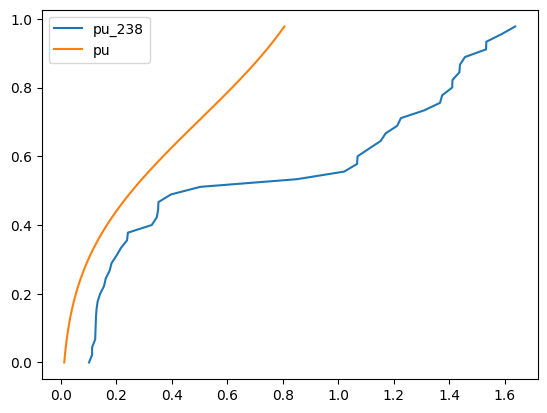

In [18]:

m=np.mean(pu_238) # среднее
D=np.var(pu_238) # дисперсия
pu=stats.norm.cdf(np.linspace(0,1,len(pu_238)), loc=m, scale=D) # строим совокупность с нормальным распределение с таким же средним и дисперсией как в примере
plt.plot(np.sort(pu_238), np.linspace(0,1,len(pu_238), endpoint=False), label='pu_238')
plt.plot(np.sort(pu), np.linspace(0,1,len(pu), endpoint=False), label='pu')
plt.legend() # на графике видим, разницу между нормальным распределением и ненормальным распределением 
stats.shapiro(pu_238), stats.shapiro(pu)

In [3]:
#Т.к. не соблюдаются условия применимости ANOVA, используем
stats.kruskal(pu_238, pu_239, pu_240, pu_241)

KruskalResult(statistic=np.float64(167.8178522154513), pvalue=np.float64(3.76478949748032e-36))

Даны квартальные прибыли акции Johnson&Johnson с 1960-1980 гг
Есть ли различия прибыли между 4-мя кварталами?
Провести EDA (проверка на нормальность, проверка на однородность дисперсий с помощью Барлетт теста
from scipy.stats import bartlett)
Учитывайте при выборе теста тот факт, что при сбалансированных данных (выборки одинакового объема),
неоднородность дисперсий слабо влияет на результат)


In [19]:
JJ_1=np.array([0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ])
JJ_2=np.array([1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ])
JJ_3=np.array([3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83])
JJ_4=np.array([6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61 ])

(ShapiroResult(statistic=np.float64(0.9837693211623376), pvalue=np.float64(0.968833749631303)),
 BartlettResult(statistic=np.float64(109.62893110687119), pvalue=np.float64(1.3188378332498392e-23)),
 F_onewayResult(statistic=np.float64(162.03157448390618), pvalue=np.float64(6.813074435306209e-34)))

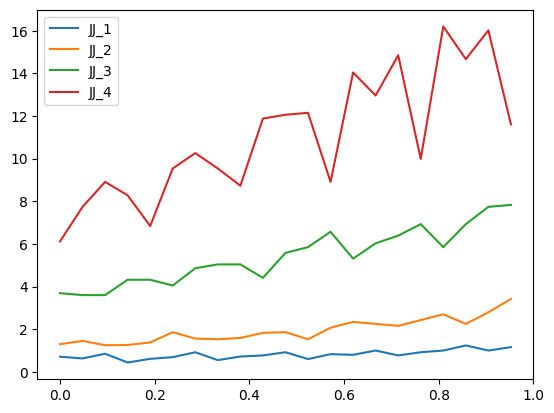

In [26]:
#Шапиро
# Барлетт
#ANOVA
plt.plot(np.linspace(0,1,len(JJ_1), endpoint=False),JJ_1, label='JJ_1')
plt.plot(np.linspace(0,1,len(JJ_2), endpoint=False),JJ_2, label='JJ_2')
plt.plot(np.linspace(0,1,len(JJ_3), endpoint=False), JJ_3, label='JJ_3')
plt.plot(np.linspace(0,1,len(JJ_4), endpoint=False), JJ_4,label='JJ_4')
plt.legend()
stats.shapiro(JJ_1), stats.bartlett(JJ_1, JJ_2, JJ_3, JJ_4), stats.f_oneway(JJ_1, JJ_2, JJ_3, JJ_4)